<a href="https://colab.research.google.com/github/Piternicolas/ChurnPrediction/blob/main/CHURN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHURN PREDICTION EM EMPRESA DE TELEFONIA**
* Em resumo, **Churn Prediction** significa prever quando um cliente tem altas chances de cancelar um serviço ou assinatura, ou quando você vai perder um cliente. Geralmente há um certo tipo de padrão em tudo, em específico nesse projeto irei trabalhar em cima do comportamento de clientes que cancelaram o serviço e irei desenvolver um `algoritmo de machine learning` capaz de prever os clientes que tenham altas chances de cancelar o serviço de assinatura dessa empresa de telefonia.

Os dados foram coletados do site **Kaggle**, não há descrições sobre os dados ou das colunas, mas são bem autoexplicativos.

In [ ]:
# IMPORTANDO BIBLIOTECAS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

!pip install scikit-plot -q
!pip install imbalanced-learn -q

In [ ]:
# CONFIGURANDO PARA VIZUALIZAR TODAS AS LINHAS E COLUNAS
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
# ANALISANDO AS COLUNAS E AS PRIMEIRAS ENTRADAS
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df[:5]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# VIZUALIANDO A QUANTIDADE DOS DADOS
print('Colunas:\t',df.shape[1])
print('Entradas:\t',df.shape[0])

Colunas:	 21
Entradas:	 7043


In [ ]:
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

### **Dicionário das colunas:**
* **customerID:** Identificação do cliente.
* **gender:** Gênero.
* **SeniorCitizen:** Idoso(a).
* **Partner:** Parceiro(a).
* **Dependents:** Dependentes.
* **tenure:** Posse.
* **PhoneService:** Serviço de telefone.
* **MultipleLines:** Múltiplas linhas.
* **InternetService:** Serviço de internet.
* **OnlineSecurity:** Segurança online.
* **OnlineBackup:** Cópia de segurança online.
* **DeviceProtection:** Proteção de disposição.
* **TechSupport:** Suporte técnico.
* **StreamingTV:** Serviço de Streaming.
* **StreamingMovies:** Filmes de streaming.
* **Contract:** Tempo de ontrato.
* **PaperlessBilling:** Faturamento sem boleto.
* **PaymentMethod:** Forma de pagamento.
* **MonthlyCharges:** Cobranças mensais.
* **TotalCharges:** Cobrança total.
* **Churn:** Se o cliente cancelou ou não.


* Abaixo começo a fazer uma análise exploratória no dados, verificar se estão corretos, se estão faltando dados e tratar devidamente os erros.

In [ ]:
# VERIFICANDO AS ENTRADAS NULAS
df.isna().sum().sort_values(ascending=False)

customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64

In [ ]:
# VERIFICANDO OS TIPOS DAS COLUNAS
print(df.dtypes)
df[:1]

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


* A coluna **TotalCharges** é uma coluna númerica porém está classificada como `object`, vou investigar o porque e corrigir para `float`

In [ ]:
# VERIFICANDO OS VALORES UNICOS NA COLUNA TotalCharges
df['TotalCharges'].value_counts()[:5]

         11
20.2     11
19.75     9
20.05     8
19.9      8
Name: TotalCharges, dtype: int64

In [ ]:
# CONSEGUIMOS IDENTIFICAR QUE HÁ ENTRADAS QUE ESTÃO PREENCHIDAS COM ESPAÇO
print(round(df[df['TotalCharges'] == ' '].shape[0] / df.shape[0]*100,2))

# DROPANDO AS ENTRADAS
df = df.drop(df[df['TotalCharges'] == ' '].index)
df = df.reset_index(drop=True)

0.16


Como as entradas vazias representam apenas 0,16% dos dados eu excluí ao invés de tratar, caso fosse um valor superior a 2% eu iria preencher os valores fazendo os calculos com a coluna `Contract` e `MonthlyCharges`.

In [ ]:
# TRANSFORMANDO A COLUNA TOTALCHARGES PARA O TIPO CORRETO
print('Antes:\t',df['TotalCharges'].dtype)
df['TotalCharges'] = df['TotalCharges'].astype('float')
print('Depois:\t',df['TotalCharges'].dtype)

Antes:	 object
Depois:	 float64


* Agora com as colunas com o tipo correto e as entradas todas preenchidas vou verificar os valores únicos em cada coluna para entender melhor esse DataFrame.

In [ ]:
# VERIFICANDO QUANTOS VALORES ÚNICOS M CADA COLUNA OBJECT
print(df.select_dtypes('object').nunique().sort_values(ascending=False))

customerID          7032
PaymentMethod          4
DeviceProtection       3
Contract               3
StreamingMovies        3
StreamingTV            3
TechSupport            3
OnlineBackup           3
OnlineSecurity         3
InternetService        3
MultipleLines          3
gender                 2
PhoneService           2
Dependents             2
PaperlessBilling       2
Partner                2
Churn                  2
dtype: int64


* Como é notavel, a coluna `customerID` é somente para identificação e não será necessária manter ela no DataFrame, ela mais acaba atrapalhando do que ajudando.

In [ ]:
# DROPANDO A COLUNA CUSTOMERID
df = df.drop('customerID', axis=1)

In [ ]:
# VERIFICANDO OS VALORES ÚNICOS
print('Valores:',np.unique(df.select_dtypes('object').values).shape[0])
print(np.unique(df.select_dtypes('object').values).tolist())

Valores: 15
['Bank transfer (automatic)', 'Credit card (automatic)', 'DSL', 'Electronic check', 'Female', 'Fiber optic', 'Mailed check', 'Male', 'Month-to-month', 'No', 'No internet service', 'No phone service', 'One year', 'Two year', 'Yes']


In [ ]:
# VERIFICANDO AS VALORES NUMÉRICOS
round(df.select_dtypes(['float','int']).describe(),2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.00,7032.00,7032.00,7032.00
mean,0.16,32.42,64.80,2283.30
std,0.37,24.55,30.09,2266.77
min,0.00,1.00,18.25,18.80
25%,0.00,9.00,35.59,401.45
50%,0.00,29.00,70.35,1397.48
75%,0.00,55.00,89.86,3794.74
max,1.00,72.00,118.75,8684.80


* ↑ A coluna `SeniorCitizen` se trata de um sim ou não, a coluna `Tenure` pelo que parece se trata de tempo de contrato e as colunas de `Charges` se tratam de preços.

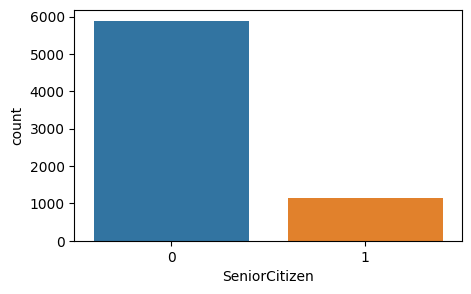

In [ ]:
# VERIFICANDO DISTRIBUIÇÃO DA COLUNA SENIORCITIZEN
fig, ax = plt.subplots(figsize=(5,3))

sns.countplot(x='SeniorCitizen', data=df, ax=ax);

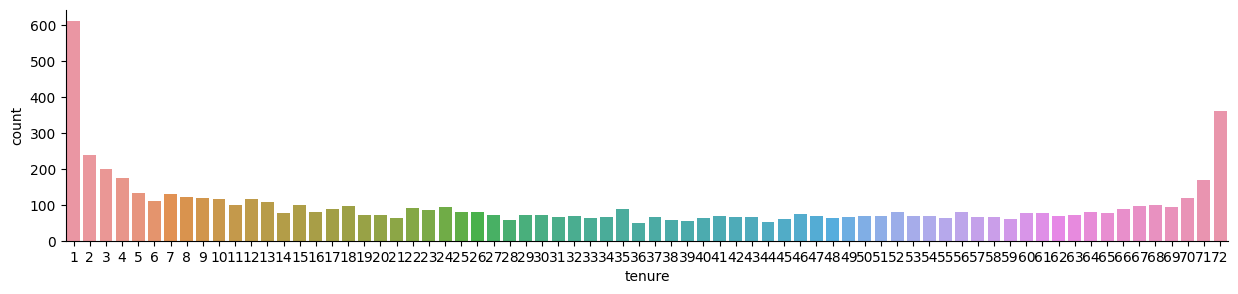

In [ ]:
# VERIFICANDO DISTRUBUIÇÃO DA COLUNA TENURE
fig, ax = plt.subplots(figsize=(15,3))

sns.countplot(x='tenure', data=df);
ax.spines[['top','right']].set_visible(False)

In [ ]:
# CONFIRMAÇÃO SE A COLUNA TENURE ESTÁ COMO MÊS
dftenure = df[['tenure','Contract','MonthlyCharges','TotalCharges']][:10]
dftenure['TesteTenure'] = round(dftenure['TotalCharges'] / dftenure['tenure'],2)
dftenure

,tenure,Contract,MonthlyCharges,TotalCharges,TesteTenure
0,1,Month-to-month,29.85,29.85,29.85
1,34,One year,56.95,1889.50,55.57
2,2,Month-to-month,53.85,108.15,54.08
3,45,One year,42.30,1840.75,40.91
4,2,Month-to-month,70.70,151.65,75.82
5,8,Month-to-month,99.65,820.50,102.56
6,22,Month-to-month,89.10,1949.40,88.61
7,10,Month-to-month,29.75,301.90,30.19
8,28,Month-to-month,104.80,3046.05,108.79
9,62,One year,56.15,3487.95,56.26


* Acima foi apenas uma prova que realmente a coluna `tenure` contém os valores na escala de mês, na coluna nova `TesteTenure` confirma que os valores são bem aproximados.

---
* ### Abaixo podemos ver em quais meses há mais cancelamento na coluna **`Churn`**


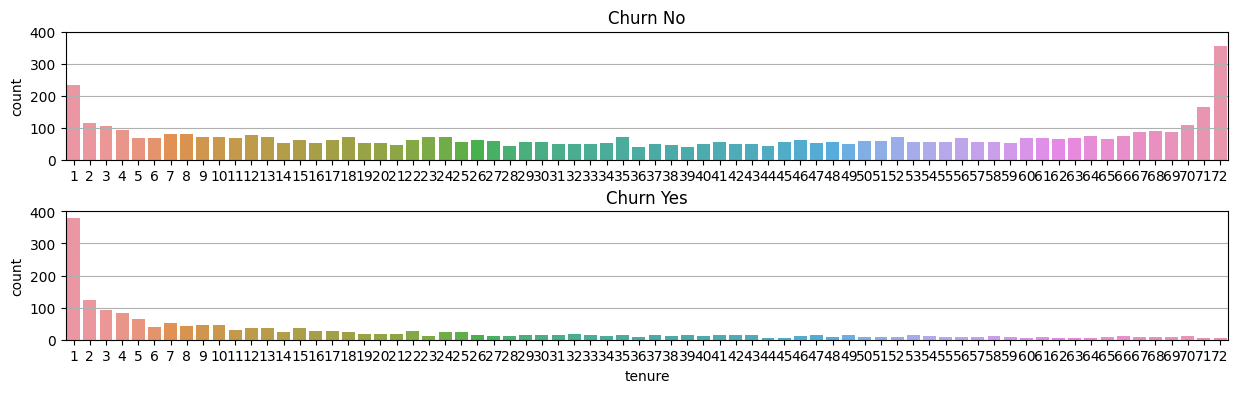

In [ ]:
# VISUALIZANDO VALORES NA COLUNAS CHURN
fig, ax = plt.subplots(nrows=2, figsize=(15,4))
plt.subplots_adjust(hspace=0.4)

# NO
ax[0].set_title('Churn No')
sns.countplot(x='tenure', data=df[df['Churn'] == 'No'], ax=ax[0]);
ax[0].set_xlabel(' ')
ax[0].set_yticks(range(0,401,100))
ax[0].grid(axis='y')

# YES
ax[1].set_title('Churn Yes')
sns.countplot(x='tenure', data=df[df['Churn'] == 'Yes'], ax=ax[1]);
ax[1].set_yticks(range(0,401,100))
ax[1].grid(axis='y')

* ### ↑ É notavel que há mais recorrência de `Churn Yes` nos primeiros meses.


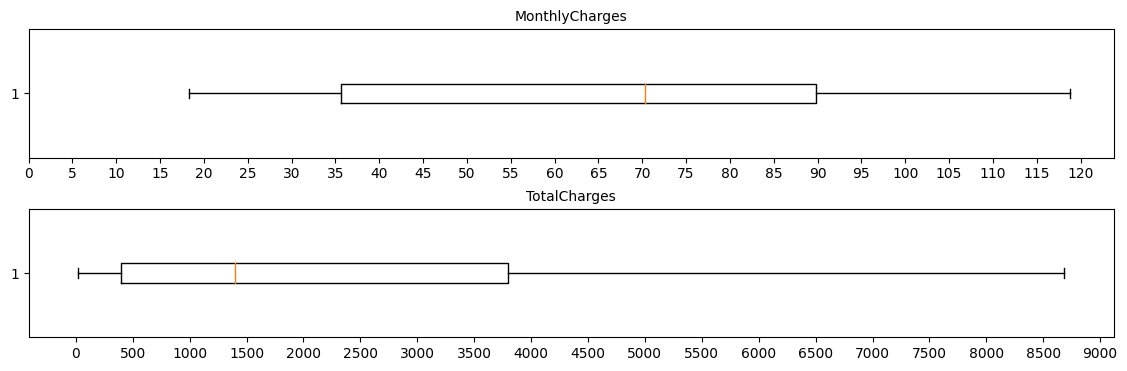

In [ ]:
# BOXPLOT PARA VERIFICAR OUTLIERS
fig, ax = plt.subplots(nrows=2, figsize=(14,4))
plt.subplots_adjust(hspace=0.4)

ax[0].set_title('MonthlyCharges', fontsize=10)
ax[0].boxplot(x='MonthlyCharges', data=df, vert=False)
ax[0].set_xticks(range(0,121, 5))

ax[1].set_title('TotalCharges', fontsize=10)
ax[1].boxplot(x='TotalCharges', data=df, vert=False)
ax[1].set_xticks(range(0, 9001, 500))

plt.show()

* ↑ Podemos ver que nas colunas númericas não `float` não há outliers.

7 Colunas


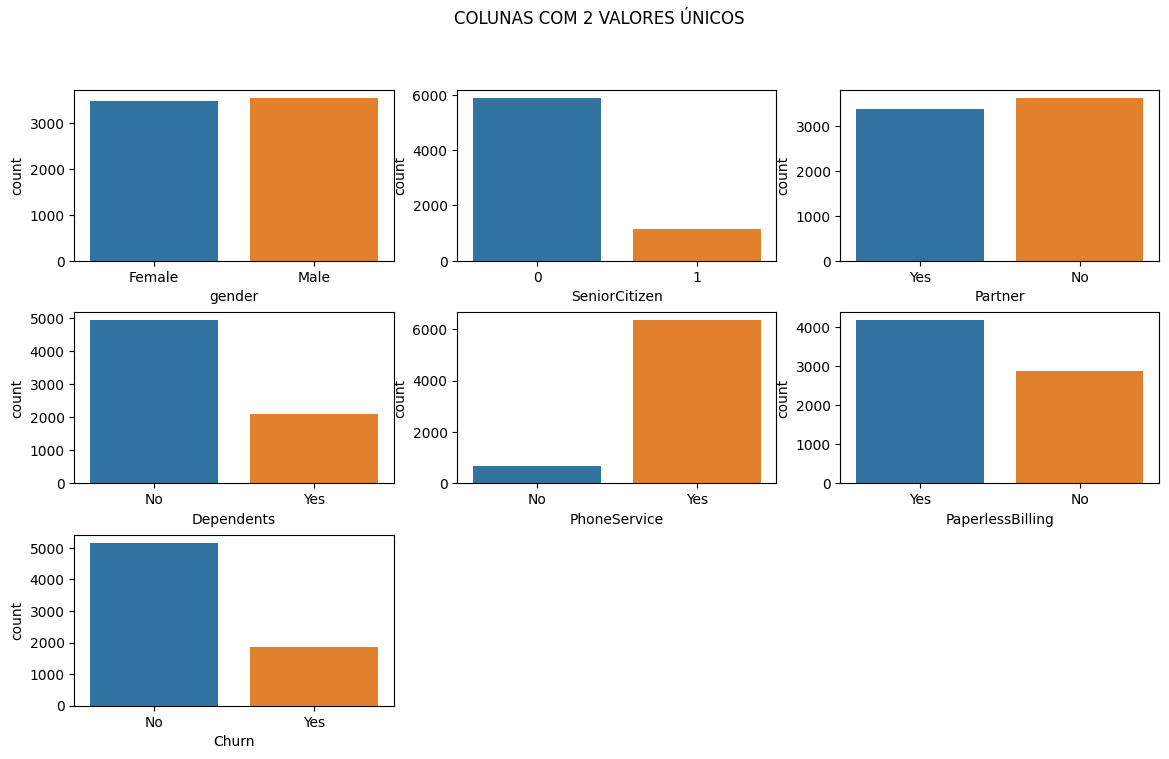

In [ ]:
# VISUALIZANDO COLUNAS COM 2 VALORES ÚNICOS
print('{} Colunas'.format(df.nunique()[df.nunique() == 2].shape[0]))
two = df.nunique()[df.nunique() == 2].index.tolist()

fig, axes = plt.subplots(nrows=len(two) // 3 + len(two) % 3, ncols=3 , figsize=(14,8))
plt.subplots_adjust(hspace=0.3)

fig.suptitle('COLUNAS COM 2 VALORES ÚNICOS')
for i, cols in enumerate(two):
  ax = axes[i // 3, i % 3]
  sns.countplot(x=cols, data=df, ax=ax)
  ax.set_xlabel(cols)

for i in range(len(two), len(axes.flatten())):
    axes.flatten()[i].remove()

* ↑ Acima vemos a distrubuição dos dados nas colunas que contém 2 valores únicos, não há um padrão para os valores, há bastante variação entre `Yes` e `No` nas colunas.

9 Colunas


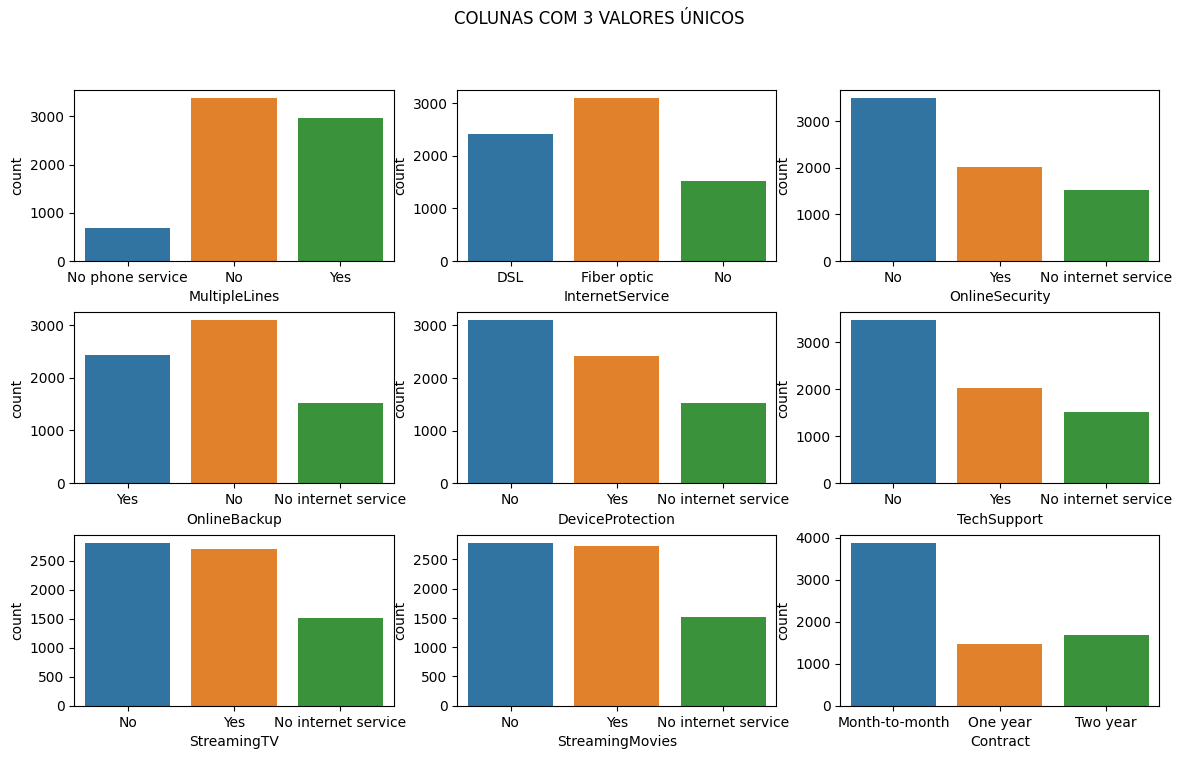

In [ ]:
# VISUALIZANDO COLUNAS COM 3 VALORES ÚNICOS
print('{} Colunas'.format(df.nunique()[df.nunique() == 3].shape[0]))
three = df.nunique()[df.nunique() == 3].index.tolist()

fig, axes = plt.subplots(nrows=len(three) // 3 + len(three) % 3, ncols=3 , figsize=(14,8))
plt.subplots_adjust(hspace=0.3)
fig.suptitle('COLUNAS COM 3 VALORES ÚNICOS')

for i, cols in enumerate(three):
  ax = axes[i // 3, i % 3]
  sns.countplot(x=cols, data=df, ax=ax)
  ax.set_xlabel(cols)

* ↑ Acima podemos ver a distribuição nas colunas que contém 3 valores únicos.
 * Na maioria das colunas o `No` é o que tem mais recorrência.
 * `Yes` normalmente é o segundo com mais recorrência.

## Abaixa vou começar a fazer o pré-processamento dos dados e deixar pronto para fazer os modelos de machine learning.
* Preciso passar todas as colunas para o formato em números, as colunas binárias vou usar o Label Encoder para fazer essa conversão.

In [ ]:
# DEFININDO COLUNAS
# Colunas binárias
bi_cols = df.nunique()[df.nunique() == 2].index.tolist()

#Colunas numéricas
num_cols = [col for col in df.select_dtypes(['float','int']).columns.tolist() if col not in bi_cols]

#Colunas object
mult_cols = [col for col in df.columns.tolist() if col not in bi_cols + num_cols]

In [ ]:
# Importando a biblioteca necessária
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Aplicando Label Encoder nas colunas binárias
for cols in bi_cols:
  df[cols] = le.fit_transform(df[cols])

# Aplicando Enconding nas colunas com múltiplas classes
print('Colunas antes:\t',df.shape[1])
df = pd.get_dummies(df, columns=mult_cols)
print('Colunas depois:\t',df.shape[1])

Colunas antes:	 20
Colunas depois:	 41


In [ ]:
df[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


# **`Machine Learning`**
* Com os dados previamente prontos, irei separar em dados de **treino, teste e validação**.

In [ ]:
# DEFININDO VARIÁVEIS
X = df.drop('Churn', axis=1)
y = df['Churn']

# Separando dados para teste, treino e validação
from sklearn.model_selection import train_test_split
X_princ, X_test, y_princ, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_princ, y_princ, test_size=0.2, random_state=0)

print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('')
print('X_test:\t',X_test.shape)
print('y_train:',y_test.shape)
print('')
print('X_val:\t',X_val.shape)
print('y_train:',y_val.shape)

X_train: (4500, 40)
y_train: (4500,)

X_test:	 (1407, 40)
y_train: (1407,)

X_val:	 (1125, 40)
y_train: (1125,)


* ### Abaixo já começo a ver as primeiras pontuções com os dados.

In [ ]:
# Importando as bibliotecas necessárias
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# ALGORITMOS
from sklearn.linear_model import LogisticRegression

In [ ]:
# CRIANDO MODELO PARA AVALIAÇÃO
def val_model(X, y, clf, quite=False):
  X = np.array(X)
  y = np.array(y)

  pipeline = make_pipeline(StandardScaler(), clf)
  score = cross_val_score(pipeline, X, y, scoring='recall')

  if quite == False:
    print('Recal: {:.2f} (+/- {:.2f})'.format(score.mean(), score.std()))

  return score.mean()

In [ ]:
# Primeiro teste com a regressão logística
lr = LogisticRegression()
score_baseline = val_model(X_train, y_train, lr)

Recal: 0.55 (+/- 0.03)


* ### Agora já com uma ideia da pontuação inicial irei trabalhar em cima dos dados para conseguir uma melhora no algoritmo. Como já sabemos que na coluna `Churn` os dados estão balanceados, irei balancear para ficar equilibrado e atingir uma melhor pontuação no algoritmo.

In [ ]:
# PADRONIZANDO OS DADOS
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_val = StandardScaler().fit_transform(X_val)

# BALANCEANDO OS DADOS
print('y_train antes:\n',y_train.value_counts())
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
print('')
X_trainblc, y_trainblc = rus.fit_resample(X_train, y_train)
X_testblc, y_testblc = rus.fit_resample(X_test, y_test)
X_valblc, y_valblc = rus.fit_resample(X_val, y_val)

print('y_train depois:\n',y_trainblc.value_counts())

y_train antes:
 0    3295
1    1205
Name: Churn, dtype: int64

y_train depois:
 0    1205
1    1205
Name: Churn, dtype: int64


* #### Vou avaliar vários modelos com os dados de teste.

In [ ]:
# IMPORTANTO ALGORITMOS
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# ALGORITMOS
rf = RandomForestClassifier()
tree = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

In [ ]:
model = []
recall = []

# Avaliando os modelos
for clf in (rf ,tree, sgdc, svc, lr, xgb, lgbm):
  model.append(clf.__class__.__name__)
  recall.append(val_model(X_trainblc, y_trainblc, clf, quite=True))

pd.DataFrame(data=recall, index=model, columns=['Recall']).sort_values(by='Recall', ascending=False)

,Recall
LogisticRegression,0.795021
SVC,0.787552
LGBMClassifier,0.769295
SGDClassifier,0.768465
RandomForestClassifier,0.758506
XGBClassifier,0.752697
DecisionTreeClassifier,0.672199


* ### ↑ Acima o algoritmo de **Regressão Logística** apresentou a maior pontuação, porém vou trabalhar com o algoritmo **`XGBClassifier`** pois ele tem vários parâmetros que dá para melhorar o algoritmo.
---
### Abaixo vou procurar os melhores parâmetros para o algoritmos conseguir uma previsão melhor.

In [ ]:
xmodel = XGBClassifier(learning_rate=0.1)

param = {'n_estimators':range(0,1000,50)}

# identificando parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xmodel, param, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_trainblc, y_trainblc)

print("melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))


melhor: 0.793340220385675 para {'n_estimators': 50}


In [ ]:
xmodel = XGBClassifier(learning_rate=0.1, n_estimators=50)

params = {'max_depth':range(1,8,1),
          'min_child_weight':range(1,5,1)}

kfold = StratifiedKFold(n_splits=10, shuffle=True)

grid_search = GridSearchCV(xgb, params, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_trainblc, y_trainblc)

print('Melhor: {} para {}'.format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8132300275482095 para {'max_depth': 1, 'min_child_weight': 1}


In [ ]:
xmodel = XGBClassifier(learning_rate=0.1, n_estimators=50, max_depth=1, min_child_weight=1)

params = {'gamma':[i/10.0 for i in range(0,5)]}

kfold = StratifiedKFold(n_splits=10, shuffle=True)

grid_search = GridSearchCV(xmodel, params, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_trainblc, y_trainblc)

print('Melhor: {} para {}'.format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8265771349862259 para {'gamma': 0.0}


In [ ]:
xmodel = XGBClassifier(n_estimators=50, max_depth=1, min_child_weight=1, gamma=0.0)

params = {'learning_rate': [0.001, 0.01, 0.1, 1]}

kfold = StratifiedKFold(n_splits=10, shuffle=True)

grid_search = GridSearchCV(xmodel, params, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_trainblc, y_trainblc)

print('Melhor {:.4f} para {}'.format(grid_result.best_score_, grid_result.best_params_))

Melhor 0.8871 para {'learning_rate': 0.001}


In [ ]:
# BIBLIOTECAS DAS MÉTRICAS
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report

In [ ]:
# MODELO FINAL
xmodel = XGBClassifier(learning_rate=0.001, n_estimators=50, max_depth=1, min_child_weight=1, gamma=0.0)

xmodel.fit(X_trainblc, y_trainblc)

y_pred = xmodel.predict(X_testblc)
y_predval = xmodel.predict(X_valblc)

print('ROC DADOS TESTE:',round(roc_auc_score(y_testblc, y_pred)*100,2))
print('CLASSIFICATION REPORT NOS DADOS DE TESTE')
print(classification_report(y_testblc, y_pred))

ROC DADOS TESTE: 72.73
CLASSIFICATION REPORT NOS DADOS DE TESTE
              precision    recall  f1-score   support

           0       0.82      0.59      0.68       374
           1       0.68      0.87      0.76       374

    accuracy                           0.73       748
   macro avg       0.75      0.73      0.72       748
weighted avg       0.75      0.73      0.72       748



In [ ]:
print('ROC DADOS VALIDAÇÃO:',round(roc_auc_score(y_valblc, y_predval)*100,2))
print('CLASSIFICATION REPORT NOS DADOS DE VALIDAÇÃO')
print(classification_report(y_testblc, y_pred))

ROC DADOS VALIDAÇÃO: 73.79
CLASSIFICATION REPORT NOS DADOS DE VALIDAÇÃO
              precision    recall  f1-score   support

           0       0.82      0.59      0.68       374
           1       0.68      0.87      0.76       374

    accuracy                           0.73       748
   macro avg       0.75      0.73      0.72       748
weighted avg       0.75      0.73      0.72       748



In [ ]:
# MATRIZ DE VALIDAÇÃO
testmatrix = confusion_matrix(y_testblc, y_pred)
valmatrix = confusion_matrix(y_valblc, y_predval)

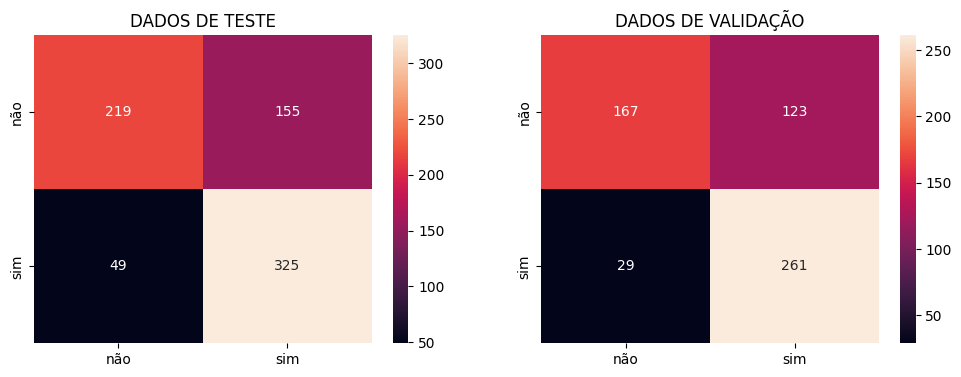

In [ ]:
# VIZUALIANDO PLOT
fig, ax = plt.subplots(ncols=2, figsize=(12,4))

ylabel = ['não', 'sim']
xlabel = ['não', 'sim']

ax[0].set_title('DADOS DE TESTE')
sns.heatmap(testmatrix, annot=True, fmt='d', xticklabels=xlabel, yticklabels=ylabel, ax=ax[0])

ax[1].set_title('DADOS DE VALIDAÇÃO')
sns.heatmap(valmatrix, annot=True, fmt='d', xticklabels=xlabel, yticklabels=ylabel, ax=ax[1])

plt.show()

# **`Conclusão`**
* Tanto nos dados de teste quanto nos dados de validação obtive uma pontuação boa, os dados se comportaram bem e foram processados corretamente. Com esse algoritmo já conseguimos prever clientes com altas chances de cancelar os serviços com essa empresa de telefonia.
---
## **`Onde me encontrar:`**
* **linkedin:** https://www.linkedin.com/in/piternicolas/
* **instagram:** https://instagram.com/pit.nlima/